# Exercices

## Suite de Fibonacci

Leonardo Fibonacci (*circa* 1175 – 1250), mathématicien italien, proposa comme un exercice mathématique amusant le modèle suivant pour décrire la croissance naturelle d’une population de lapins. On suppose qu’on dispose d’un couple de lapins tout juste nés, maintenus isolés de leurs congénères. On suppose de plus que chaque mois, chaque couple âgé d’au moins deux mois engendre un nouveau couple de lapins. On ne tient pas compte de la mortalité naturelle des lapins. Le nombre $C_n$ de couples de lapins suit par conséquent une relation de récurrence,

$$
C_0 = C_1 = 1 \ \ \ , \ \ \  C_n = C_{n-1}+C_{n-2}
$$

La suite d’entiers $C_n$ est connue comme la suite de Fibonacci. On commence par inclure les paquets `numpy` et `matplotlib`

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Créez un tableau `ns` de 50 entiers de 0 à 49 inclus.

In [152]:
N = 10
ns = np.arange(N)
ns

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

2. En utilisant une boucle `for`, la valeur des deux premiers termes $C_0$ et $C_1$, et la relation de récurrence, calculez les 50 premières valeurs de cette suite, et stockez-les dans un tableau numpy `C`.

In [164]:
C = np.empty(N, dtype='int64')
C[0] = 1
C[1] = 1

for i in range(2, N):
    C[i] = C[i - 1] + C[i - 2]

3. Représentez l’évolution du nombre de couples de lapins en fonction du temps (exprimé en mois), pendant 50 mois. Pensez à ajouter un titre, à indiquer les axes et les unités.

In [165]:
lapins = C.copy()
temps = np.arange('2022', '2040', step = '1', dtype = 'datetime64[M]')[:len(lapins)]

# Création d'un dictionnaire
dic_lapins_evolution = {"temps"  : temps, 
                      "lapins" : lapins}

# Création du DataFrame
df = pd.DataFrame(data = dic_lapins_evolution)

In [166]:
df.head(n=2)

,temps,lapins
0,2022-01-01,1
1,2022-02-01,1


Text(0, 0.5, 'Lapins (couples)')

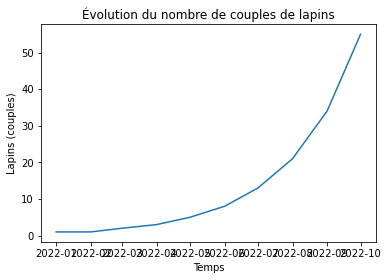

In [168]:
plt.plot(df["temps"], df["lapins"])
plt.title("Évolution du nombre de couples de lapins")
plt.xlabel("Temps")
plt.ylabel("Lapins (couples)")

4. Ajoutez dans votre programme le calcul de la suite des rapports $r_n$ entre deux termes successifs de la suite de Fibonacci (pour $n$ allant de 1 à 49 inclus) :
$$
r_n = \frac{C_{n + 1}}{C_n}
$$

In [185]:
r_n = C[1:] / C[:-1]
r_n = np.append(r_n, r_n[len(r_n) - 1])

df["rapport"] = r_n

5. Tracez le graphe de ce rapport $r_n$ en fonction du mois $n$, pour $n$ allant de 1 à 49 inclus.

Text(0, 0.5, '$r_n$')

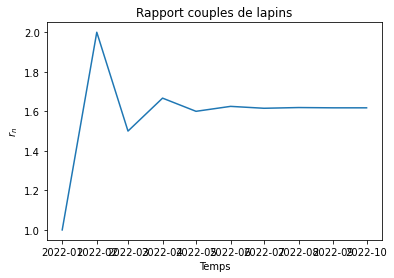

In [187]:
plt.plot(df["temps"], df["rapport"])
plt.title("Rapport couples de lapins")
plt.xlabel("Temps")
plt.ylabel("$r_n$")

On peut montrer que le rapport $r_n$ a pour limite le nombre d’or $\phi = \frac{1}{2} \left(1+\sqrt{5}\right)$. Pour des $n$ suffisamment grands, la suite $C_n$ tend donc vers une suite géométrique de la forme $D_n = A \phi^n$.

6. Tracez les 50 premiers termes de la suite de Fibonacci sur un graphe semi-logarithmique (échelle log selon les ordonnées). La suite de Fibonacci tend-elle bien vers une suite géométrique ?

In [188]:
df.head(n=2)

,temps,lapins,rapport
0,2022-01-01,1,1.0
1,2022-02-01,1,2.0


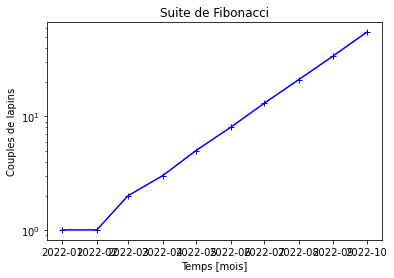

In [191]:
#phi = (1 / 2) * ( 1 + np.sqrt(5))
plt.semilogy(df["temps"], df["lapins"], 'b+-')
plt.title("Suite de Fibonacci")
plt.xlabel("Temps [mois]")
plt.ylabel("Couples de lapins")
plt.show()

Comme $\displaystyle C_n\underset{n\to\infty}{\sim} D_n$ et $\displaystyle \lim_{n\to\infty}C_n = +\infty$, on a :
$$
\log(C_n) \underset{n\to\infty}{\sim} \log(D_n) = \log A + n \log \phi
$$

7. Calculez la suite $D_n$ et stockez-la dans un tableau numpy.

In [192]:
D_n = np.log(C)

[0.         0.         0.69314718 1.09861229 1.60943791 2.07944154
 2.56494936 3.04452244 3.52636052 4.00733319]
